<IPython.core.display.Javascript object>


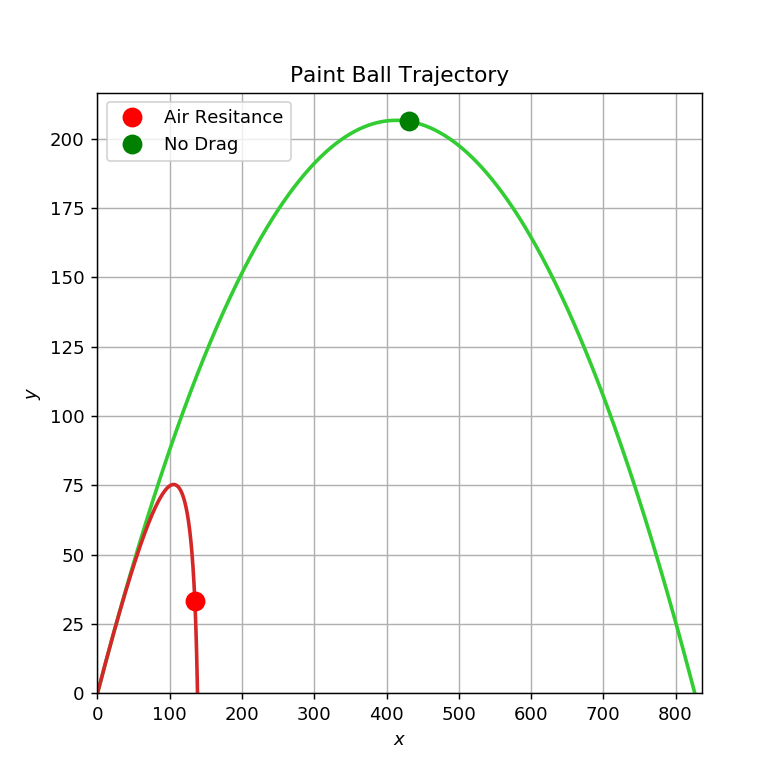

In [2]:
from matplotlib.animation import *
from mpl_toolkits.mplot3d import Axes3D
from pylab import *

g = 9.8
θ = 45
b = 0.00144
m = 0.0032
V0 = 90

cap = (2*V0*sin(θ*pi/180))/g

TTotal=linspace(0.0,cap,2500)
XR_Drag3 = (V0*cos(θ * pi/180)*(m/b))*(1-e**(-(b*TTotal)/m))
YH_Drag3 = ((m**(2)*g+b*m*V0*sin(θ * pi/180))/(b**2))*(1-e**(-(b*TTotal)/m))-((m*g*TTotal)/b)

X_Range = (TTotal*V0*cos(θ * pi/180)) 
Y_Height = ((TTotal* V0*sin(θ * pi/180)) - ((1/2)*g*(TTotal**2)))

def mass_init():     # initialize blank frames
    pm1.set_data([],[])
    pm2.set_data([],[])
    return pm1,pm2

def mass_frame(i): # frame number i
    pm1.set_data(XR_Drag3[i],YH_Drag3[i] )
    pm2.set_data(X_Range[i],Y_Height[i] )
    return pm1,pm2

%matplotlib notebook

fig1 = figure(figsize=(6,6))
ax = fig1.add_subplot(111,xlim=(0,max(X_Range+10)), ylim=(0,max(Y_Height+10)))
plot(X_Range, Y_Height, color='limegreen',linewidth=2)
plot(XR_Drag3, YH_Drag3, color='tab:red',linewidth=2)
pm1, = ax.plot([],[],'or',markersize=10,label='Air Resitance')
pm2, = ax.plot([],[],'og',markersize=10,label='No Drag')
xlabel('$x$')
ylabel('$y$')
title('Paint Ball Trajectory')
legend(loc='upper left' ,fontsize=10)
grid('on')

ani = FuncAnimation(fig1, mass_frame, init_func=mass_init, frames=len(TTotal), interval=1)
show()
